In [71]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Tokenization

In [72]:
myfile = open(r"C:\Users\ryani\Desktop\JupyterLab\20th_century\20th_century_text_scrape.txt", encoding='utf-8') 

In [73]:
# Import txt file

with open('20th_century_text_scrape.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [74]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [75]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.Historic events in the 20th century[edit]World at the beginning of the century[edit]Main article: Edwardian eraThe new beginning of the 20th century marked significant changes.", 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', '1914 saw the completion of the Panama Canal.The Scramble for Africa continued in the 1900s and resulted in wars and genocide across the continent.', 'The atrocities in the Congo Free State shocked the uncolonised world.From 1914 to 1918, the First World War, and its aftermath, caused major changes in the power bal

In [76]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today.Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'eraThe', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 'of', 'inventions', ',', 'including', 'the', 'automobi

In [77]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4775 samples and 21222 outcomes>


In [78]:
dist_words.most_common(10)

[('.', 1321),
 ('the', 1116),
 (',', 975),
 ('of', 612),
 ('and', 408),
 ('to', 325),
 ('[', 309),
 (']', 309),
 ('The', 302),
 ('in', 298)]

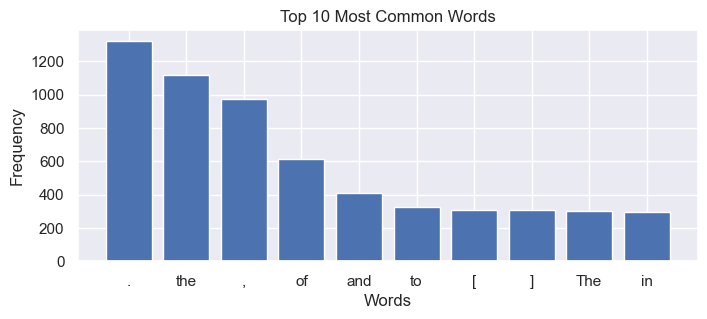

In [79]:
# Frequency Distribution Plot

# Create a figure with specified dimensions (width=8, height=3 inches)
plt.figure(figsize=(8, 3))

# Get the top 10 words and their frequencies
top_words = dist_words.most_common(10)
words = [word for word, freq in top_words]
freqs = [freq for word, freq in top_words]

# Create the bar chart using plt.bar() instead
plt.bar(words, freqs)

# Add labels and title for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')

# Display the plot
plt.show()

In [80]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'should', "i'll", "wasn't", 're', 'too', 'mustn', "i'd", 'most', 'for', 'wasn', 'they', "we'd", 'those', "weren't", "wouldn't", 'had', 'her', 'how', 'didn', 'above', 'couldn', 'where', 'can', 'your', 'shan', 'or', 'itself', 'a', 'off', 'such', "they're", 'has', "it's", 'she', "won't", 'during', 'wouldn', 'so', 'own', 'why', 'am', 'themselves', "aren't", 'd', 'the', 'on', 'ain', 'm', 'ma', 'hasn', 'to', 'by', "he'd", "they'd", "you'll", 'only', 'under', 'mightn', 'further', "that'll", 'before', 'between', 'isn', "haven't", 'against', 'about', 'hadn', 'his', 'some', 'have', "doesn't", 'in', 'ours', "she'd", "we've", 'and', 'which', "mustn't", 'because', "i'm", 'down', 'other', 'that', 'weren', 'who', 'are', 'will', 'from', "isn't", 'it', 'again', 'our', 'don', 'very', 'as', "she'll", "you'd", 'into', 'ourselves', 'what', 'its', 'i', 'been', "he's", 'than', 'we', 'yourselves', 'be', 'he', 'having', 'yours', 'just', 'my', 'an', 'while', 'all', 'whom', 'them', 'but', 'doing', 'him', 'was',

In [81]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [82]:
filtered_words

['The',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today.Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'World',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'eraThe',
 'new',
 'beginning',
 '20th',
 'century',
 'marked',
 'significant',
 'changes',
 '.',
 'The',
 '1900s',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 ',',
 'including',
 'automobile',
 ',',
 'airplane',
 'radio',
 'broadcasting',
 '.',
 '1914',
 'saw',
 'completion',
 'Panama',
 'Canal.The',
 'Scramble',
 'Africa',
 'continued',
 '1900s',
 'result

In [83]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [84]:
sans_punc

'  The      th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped      st    century    today Historic    events      th    century         edit         World    beginning    century         edit         Main    article         Edwardian    eraThe    new    beginning      th    century    marked    significant    changes         The        s    saw    decade    herald    series    inventions         including    automobile         airplane    radio    broadcasting                 saw    completion    Panama    Canal The    Scramble    Africa    continued        s    resulted    wars    genocide    across    continent         The    atrocities    Congo    Free    S

In [85]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'eraThe', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'The', 'Scramble', 'Africa', 'continued', 's', 'resulted', 'wars', 'genocide', 'across', 'continent', 'The', 'atrocities', 'Congo', 'Free', 'State', 'shocked', 'uncolonised', 'world', 'From', 'First', 'World', 'War', 'aftermath', 'ca

In [86]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words_2 = FreqDist(tokenized_word_2)
print(dist_words)

<FreqDist with 4775 samples and 21222 outcomes>


In [87]:
dist_words_2.most_common(10)

[('The', 312),
 ('December', 225),
 ('Retrieved', 208),
 ('War', 122),
 ('s', 90),
 ('war', 87),
 ('World', 75),
 ('Soviet', 62),
 ('Hitler', 50),
 ('History', 42)]

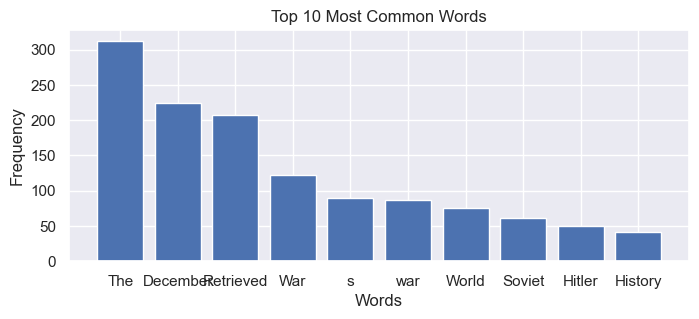

In [88]:
# Frequency Distribution Plot

# Create a figure with specified dimensions (width=8, height=3 inches)
plt.figure(figsize=(8, 3))

# Get the top 10 words and their frequencies
top_words_2 = dist_words_2.most_common(10)
words_2 = [word for word, freq in top_words_2]
freqs_2 = [freq for word, freq in top_words_2]

# Create the bar chart using plt.bar() instead
plt.bar(words_2, freqs_2)

# Add labels and title for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')

# Display the plot
plt.show()

## Most words are now relevent other than a few ('The', 's'). War is mentioned twice. Much more relevant word list now.. Can be improved.

In [89]:
dist_words_2.most_common(100)

[('The', 312),
 ('December', 225),
 ('Retrieved', 208),
 ('War', 122),
 ('s', 90),
 ('war', 87),
 ('World', 75),
 ('Soviet', 62),
 ('Hitler', 50),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('ISBN', 40),
 ('world', 37),
 ('German', 35),
 ('would', 35),
 ('Japanese', 35),
 ('edit', 34),
 ('In', 34),
 ('Japan', 33),
 ('Germans', 32),
 ('September', 32),
 ('century', 31),
 ('New', 31),
 ('Union', 31),
 ('S', 30),
 ('ISSN', 30),
 ('II', 29),
 ('became', 29),
 ('July', 28),
 ('also', 28),
 ('August', 28),
 ('Europe', 27),
 ('U', 26),
 ('A', 26),
 ('nuclear', 26),
 ('th', 25),
 ('June', 25),
 ('Battle', 25),
 ('American', 24),
 ('USA', 24),
 ('April', 24),
 ('October', 24),
 ('com', 24),
 ('new', 23),
 ('Africa', 23),
 ('end', 23),
 ('history', 23),
 ('attack', 23),
 ('weapons', 23),
 ('This', 22),
 ('Stalin', 21),
 ('BBC', 21),
 ('British', 20),
 ('one', 20),
 ('Holocaust', 20),
 ('May', 20),
 ('North', 20),
 ('Allies', 19),
 ('many', 19),
 ('two', 18),
 ('forces', 18),
 ('Allied'

In [90]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'S', 'ISBN', 'ISSN', 'How', 'On', 'p', 'U', 'S', 'A', 'com', 'th', 'also', 'would']

filtered_words_2 = [word for word in tokenized_word_2 if word not in new_stopwords]


In [91]:
filtered_words_2

['century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space',
 'based',
 'rockets',
 'World',
 'Wide',
 'Web',
 'created',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 'lives',
 'shaped',
 'st',
 'century',
 'today',
 'Historic',
 'events',
 'century',
 'edit',
 'World',
 'beginning',
 'century',
 'edit',
 'Main',
 'article',
 'Edwardian',
 'eraThe',
 'new',
 'beginning',
 'century',
 'marked',
 'significant',
 'changes',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 'including',
 'automobile',
 'airplane',
 'radio',
 'broadcasting',
 'saw',
 'completion',
 'Panama',
 'Canal',
 'Scramble',
 'Africa',
 'continued',
 'resulted',
 'wars',
 'genocide',
 'across',
 'continent',
 'atrocities',
 'Congo',
 'Free',
 'State',
 'shocked',
 'uncolonised',
 'world',
 'From',
 'First',
 'World',

In [92]:
# Convert the list to a string by joining the elements
filtered_words_2_str = ' '.join(filtered_words_2)  # spaces between words

# Now create the TextBlob with the string
blob = TextBlob(filtered_words_2_str)
tags = blob.tags


In [93]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ryani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [94]:
tags

[('century', 'NN'),
 ('changed', 'VBD'),
 ('world', 'NN'),
 ('unprecedented', 'JJ'),
 ('ways', 'NNS'),
 ('World', 'NNP'),
 ('Wars', 'NNP'),
 ('sparked', 'VBD'),
 ('tension', 'NN'),
 ('countries', 'NNS'),
 ('led', 'VBD'),
 ('creation', 'NN'),
 ('atomic', 'JJ'),
 ('bombs', 'NNS'),
 ('Cold', 'NNP'),
 ('War', 'NNP'),
 ('led', 'VBD'),
 ('Space', 'NNP'),
 ('Race', 'NNP'),
 ('creation', 'NN'),
 ('space', 'NN'),
 ('based', 'VBN'),
 ('rockets', 'NNS'),
 ('World', 'NNP'),
 ('Wide', 'NNP'),
 ('Web', 'NNP'),
 ('created', 'VBD'),
 ('These', 'DT'),
 ('advancements', 'NNS'),
 ('played', 'VBD'),
 ('significant', 'JJ'),
 ('role', 'NN'),
 ('citizens', 'NNS'),
 ('lives', 'VBZ'),
 ('shaped', 'JJ'),
 ('st', 'JJ'),
 ('century', 'NN'),
 ('today', 'NN'),
 ('Historic', 'NNP'),
 ('events', 'NNS'),
 ('century', 'NN'),
 ('edit', 'NN'),
 ('World', 'NNP'),
 ('beginning', 'VBG'),
 ('century', 'NN'),
 ('edit', 'NN'),
 ('Main', 'NNP'),
 ('article', 'NN'),
 ('Edwardian', 'NNP'),
 ('eraThe', 'VBZ'),
 ('new', 'JJ'),
 ('b

In [95]:
df_text = pd.DataFrame(tags)
df_text.columns = ['Words', "Word type"]
df_text.head()

,Words,Word type
0,century,NN
1,changed,VBD
2,world,NN
3,unprecedented,JJ
4,ways,NNS


In [96]:
df_t = df_text.groupby('Word type').count().reset_index()
df_t.head()

,Word type,Words
0,CC,1
1,CD,68
2,DT,42
3,EX,3
4,FW,10


In [97]:
top20 = df_t.nlargest(10, 'Words')
top20.head()

,Word type,Words
11,NNP,4602
10,NN,1590
6,JJ,1094
13,NNS,666
22,VBD,622


Text(0.5, 0, 'Count')

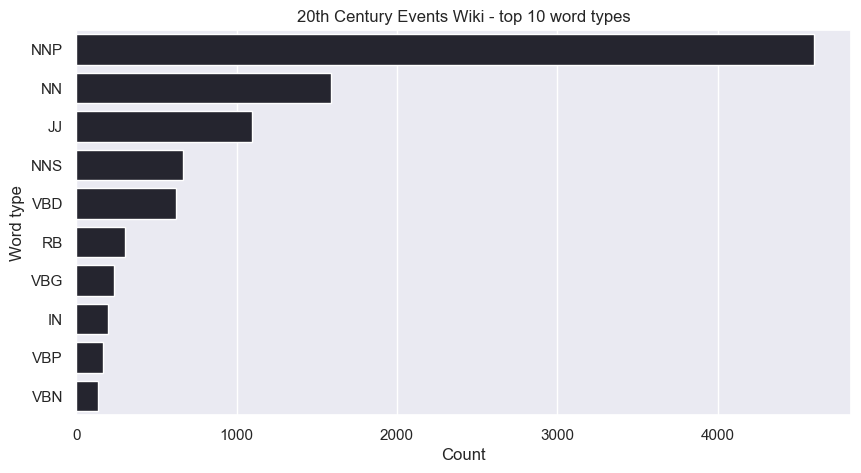

In [98]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("20th Century Events Wiki - top 10 word types")
plt.xlabel('Count')

In [99]:
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
adj_tags  = ['JJ', 'JJR', 'JJS']


In [100]:
# Filter rows by POS and count word frequencies
noun_counts = (
    df_text[df_text['Word type'].isin(noun_tags)]
    ['Words']
    .value_counts()
    .nlargest(15)
)

verb_counts = (
    df_text[df_text['Word type'].isin(verb_tags)]
    ['Words']
    .value_counts()
    .nlargest(15)
)

adj_counts = (
    df_text[df_text['Word type'].isin(adj_tags)]
    ['Words']
    .value_counts()
    .nlargest(15)
)


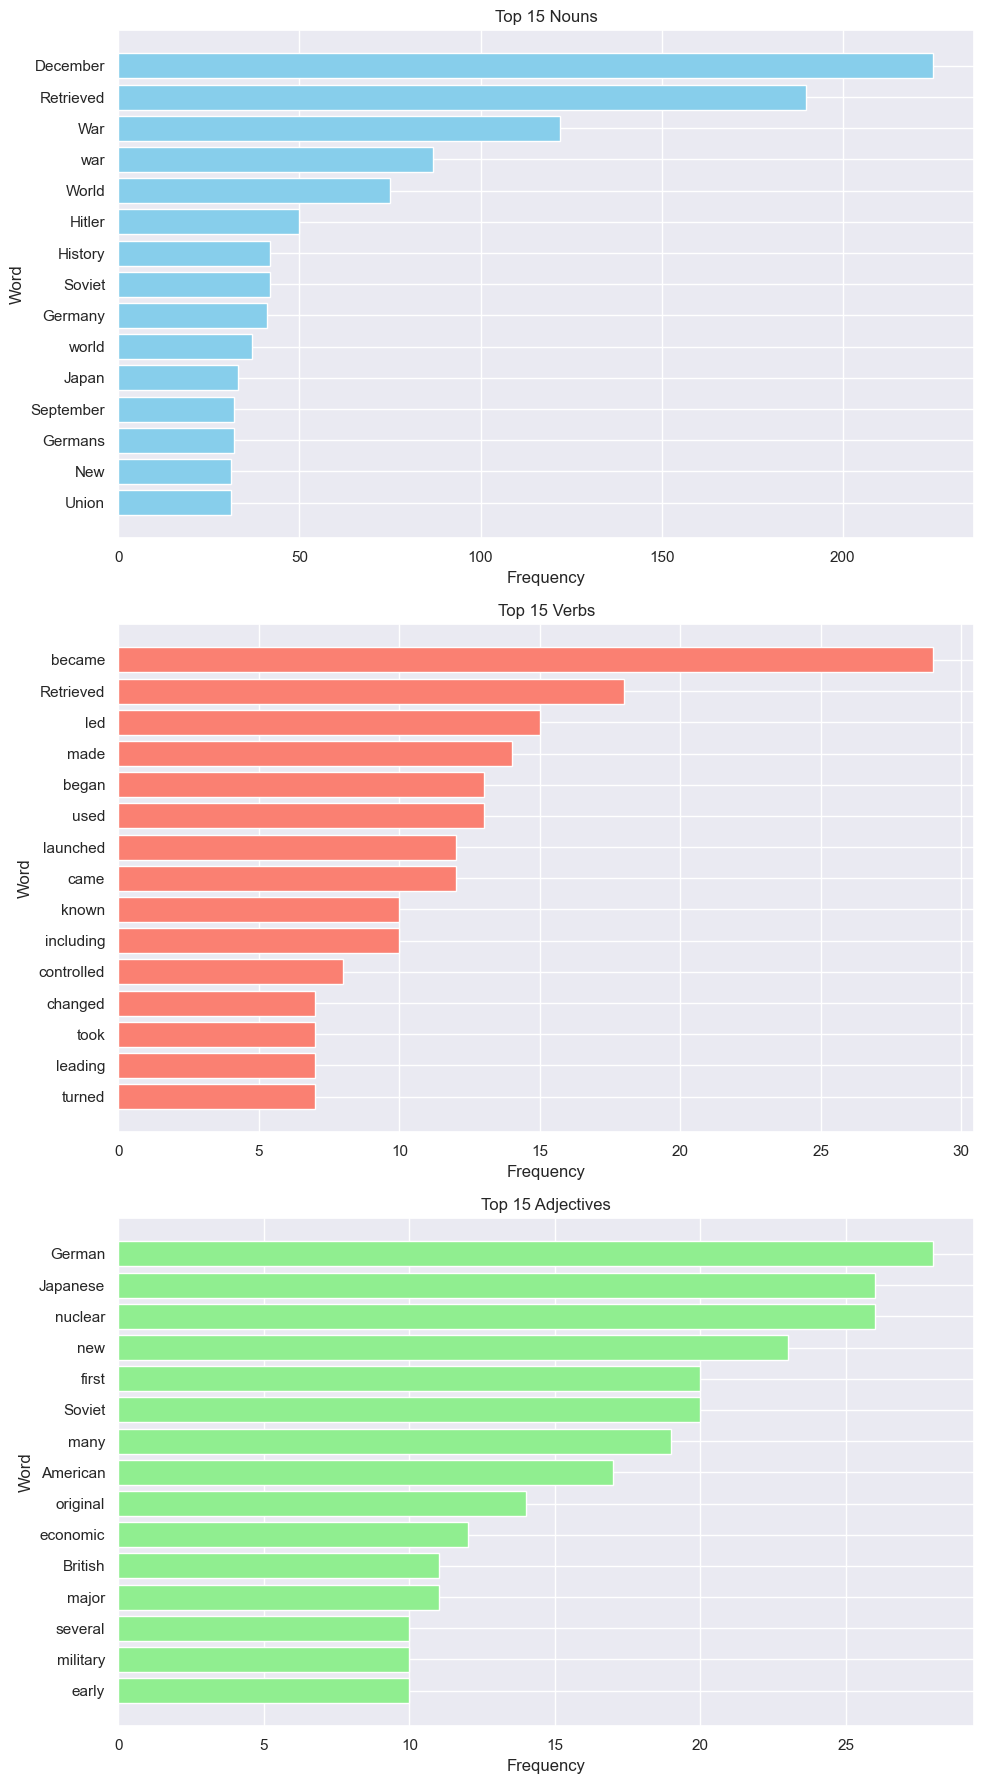

In [101]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Nouns
axes[0].barh(noun_counts.index[::-1], noun_counts.values[::-1], color='skyblue')
axes[0].set_title('Top 15 Nouns')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')

# Verbs
axes[1].barh(verb_counts.index[::-1], verb_counts.values[::-1], color='salmon')
axes[1].set_title('Top 15 Verbs')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Word')

# Adjectives
axes[2].barh(adj_counts.index[::-1], adj_counts.values[::-1], color='lightgreen')
axes[2].set_title('Top 15 Adjectives')
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('Word')

plt.tight_layout()
plt.show()



## Retrieved is both a verb and a noun and so may be over-represented. Countries appear a lot, unsurprisingly for Nouns but probably inaccurately for adjectives. The verbs are all quite aggressive, 'surrendered', 'made', 'launched'. 

In [102]:
countries_df = pd.read_csv(r"C:\Users\ryani\Desktop\JupyterLab\20th_century\countries_list_20th_century_1.5.csv")

country_list = countries_df["country_name"].dropna().tolist()
country_list


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [103]:
countries_df

,Unnamed: 0,country_name
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola
...,...,...
204,205,Sahrawi Arab Democratic Republic
205,206,Somaliland
206,207,South Ossetia
207,208,Taiwan


In [104]:
# Keep only rows where "Words" matches a country name
mentions = df_text[df_text["Words"].isin(country_list)]

# Count how often each country appears
country_freq = mentions["Words"].value_counts()


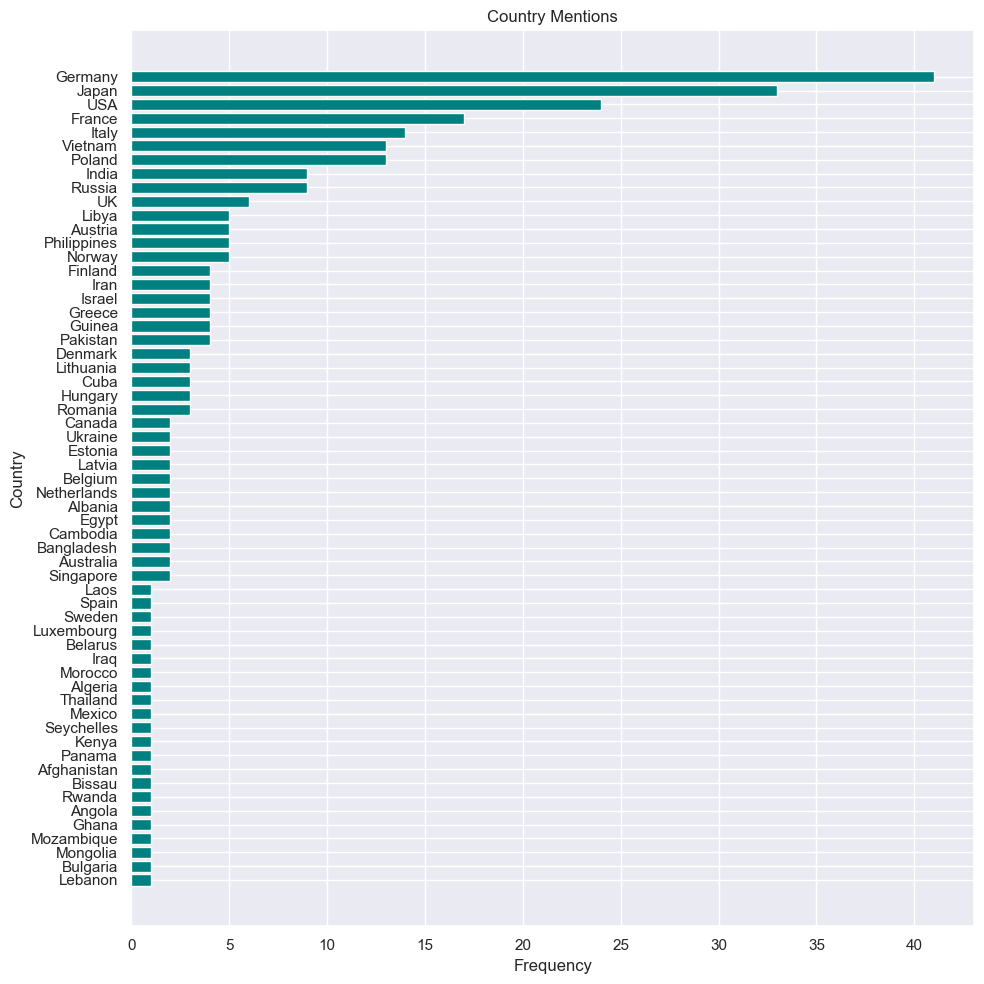

In [105]:
top_n = 60
freq_to_plot = country_freq.nlargest(top_n)

plt.figure(figsize=(10, 10))
plt.barh(freq_to_plot.index[::-1], freq_to_plot.values[::-1], color="teal")
plt.title("Country Mentions")
plt.xlabel("Frequency")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## The axis powers are mentioned the most but the allies (UK, USA) are nowhere to be seen - maybe a problem with different country names. Next steps should maybe be to add in all the vesions of UK, USA that are usually written and add them to the table, then have them all treated as one to geta true reading of the mentions.